In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import pandas as pd
import pickle
import re
import matplotlib.ticker as mtick
import matplotlib as mpl

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

sns.set_style("whitegrid")
sns.set_context(font_scale=1.1)
# sns.set(font='sans-serif')

from mergeResults import *

In [2]:
def plot_all(dirname,expname,gurobi=False, fcla=False,
             log=True, sortby="vcount",xlabel="Network size [Nodes]"):
    if (gurobi):
        results15 = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "gurobi"), 
                           os.path.join(data_path,'clustered',dirname))
    if (fcla):
        results15_fcla = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "fcla"), 
                                   os.path.join(data_path,'clustered',dirname))
    results15_fcla_l0 = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "fcla_l0"), 
                               os.path.join(data_path,'clustered',dirname))
    results15_hilbert = load_results(os.path.join(data_path, "clustered", dirname, "solutions", "hilbert"), 
                               os.path.join(data_path,'clustered',dirname))
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(5, 5), dpi=300)
    ax1.set_yscale("log", nonposx='clip')
    if (log):
        ax1.set_xscale("log", nonposx='clip', basex=2)
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by=sortby)
    if (gurobi):
        results15 = results15.sort_values(by=sortby)
    results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
    results15_hilbert = results15_hilbert.sort_values(by=sortby)
    if (fcla):
        ax1.plot(results15_fcla[sortby],results15_fcla['runtime'], 'k.-', label="WMA BF")
    if (gurobi):
        results15 = results15[results15['objective'].notnull()]
        ax1.plot(results15[sortby],results15['runtime'], 'g^--', label="Gurobi")
    results15_fcla_l0 = results15_fcla_l0[results15_fcla_l0['objective'].notnull()]
    ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['runtime'], 'ro:',label="WMA")
    ax1.plot(results15_hilbert[sortby],results15_hilbert['runtime'], 'bs-',label="Hilbert")
    ax1.set_ylabel("Runtime [Sec]")
#     plt.title(expname)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=3, mode="expand", borderaxespad=0.)
#     ax1.set_xlim([256, 16384])
#     ax2.set_xlim([256, 16384])
    plt.setp(ax1.get_xticklabels(), visible=False)
    
#     fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
#     ax2.set_yscale("log", nonposx='clip')
    
    if (log):
        ax2.set_xscale("log", nonposx='clip', basex=2)
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by=sortby)
    if (gurobi):
        results15 = results15.sort_values(by=sortby)
    results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
    results15_hilbert = results15_hilbert.sort_values(by=sortby)
    if (fcla):
        ax2.plot(results15_fcla[sortby],results15_fcla['objective'], 'k.-',label="WMA BF")
        
    #filter nan 
#     notnanind = results15_hilbert['objective'].notnull()
#     obj =results15_hilbert['objective']
#     obj= obj[notnanind]
#     ind = results15_fcla_l0[sortby]
#     ind = ind[notnanind]
    ax2.plot(results15_fcla_l0[sortby],results15_fcla_l0['objective'], 'ro:',label="WMA")
    ax2.plot(results15_hilbert[sortby],results15_hilbert['objective'], 'bs-',label="Hilbert")
    if (gurobi):
        ax2.plot(results15[sortby],results15['objective'], 'g^--',label="Gurobi")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax2.ticklabel_format(style='sci', axis='y')

In [76]:
expnames = [("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
            ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s'),
            ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
            ("brnn", "BRNN", sns.xkcd_rgb["amber"],'D'),
            ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]
typedir = "clustered"

def plot_all(dirname, expname, log=True, gurobi=True, sortby="vcount",xlabel="Network size [Nodes]",lims=None,onegraph=False):
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(4, 5), dpi=300)
#     fig, (ax1, ax2) = plt.subplots(2,figsize=(6, 4), dpi=300)
    
    for expname in expnames:
        if not gurobi and (re.match(r'gurobi',expname[0])):
            continue
        results = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname[0]), 
                               os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
#         print(results['id'])
        results = results[results['objective'].notnull()]
        
#         results = results[results['number of facilities'] >= 200]
#         results = results[results['number of facilities'] <= 600]
#         results = results[results['avg_degree'] <= 80]
        
        runtime_results = results['runtime'].copy()
        
        if (re.match(r'gurobi',expname[0])):
            runtime_results += results['sptime']
            
#             if (onegraph):
#                 lookfortime = -1
#                 for i in range(len(runtime_results)):
#                     try:
#                         f = open(os.path.join(data_path, typedir, dirname, results.iloc[i]['id'] + '.ntw.txt'), "r")
#                         distmatxtime = float(f.read())
#                         f.close()
#                         lookfortime = distmatxtime
#                     except IOError:
#                         pass
#                 if (lookfortime == -1):
#                     print("No gurobi found")
#                 else:
#                     runtime_results += lookfortime
#             else:
#                 for i in range(len(runtime_results)):
#                     try:
#                         f = open(os.path.join(data_path, typedir, dirname, results.iloc[i]['id'] + '.ntw.txt'), "r")
#                         distmatxtime = float(f.read())
#                         f.close()
#                         runtime_results.loc[results.iloc[i].name] += distmatxtime
#                     except IOError:
#                         print("No gurobi file exists for ", expname[0])
        
        ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3])
        ax2.plot(results[sortby], results['objective'], expname[2], label=expname[1], marker=expname[3])
        
    # setting first axis
    ax1.set_yscale("log")
    if (log):
        ax1.set_xscale("log", basex=2)
        ax2.set_xscale("log", basex=2)
        
    ax1.set_ylabel("Runtime [Sec]")
#     ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#               ncol=4, mode="expand", borderaxespad=0.)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # setting second axis
#     ax2.ticklabel_format(style='sci', axis='y')
#     ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    ax2.yaxis.get_major_formatter().set_powerlimits((0, 0))
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    if (lims):
        ax1.set_xlim(lims[0], lims[1])
        ax2.set_xlim(lims[0], lims[1])

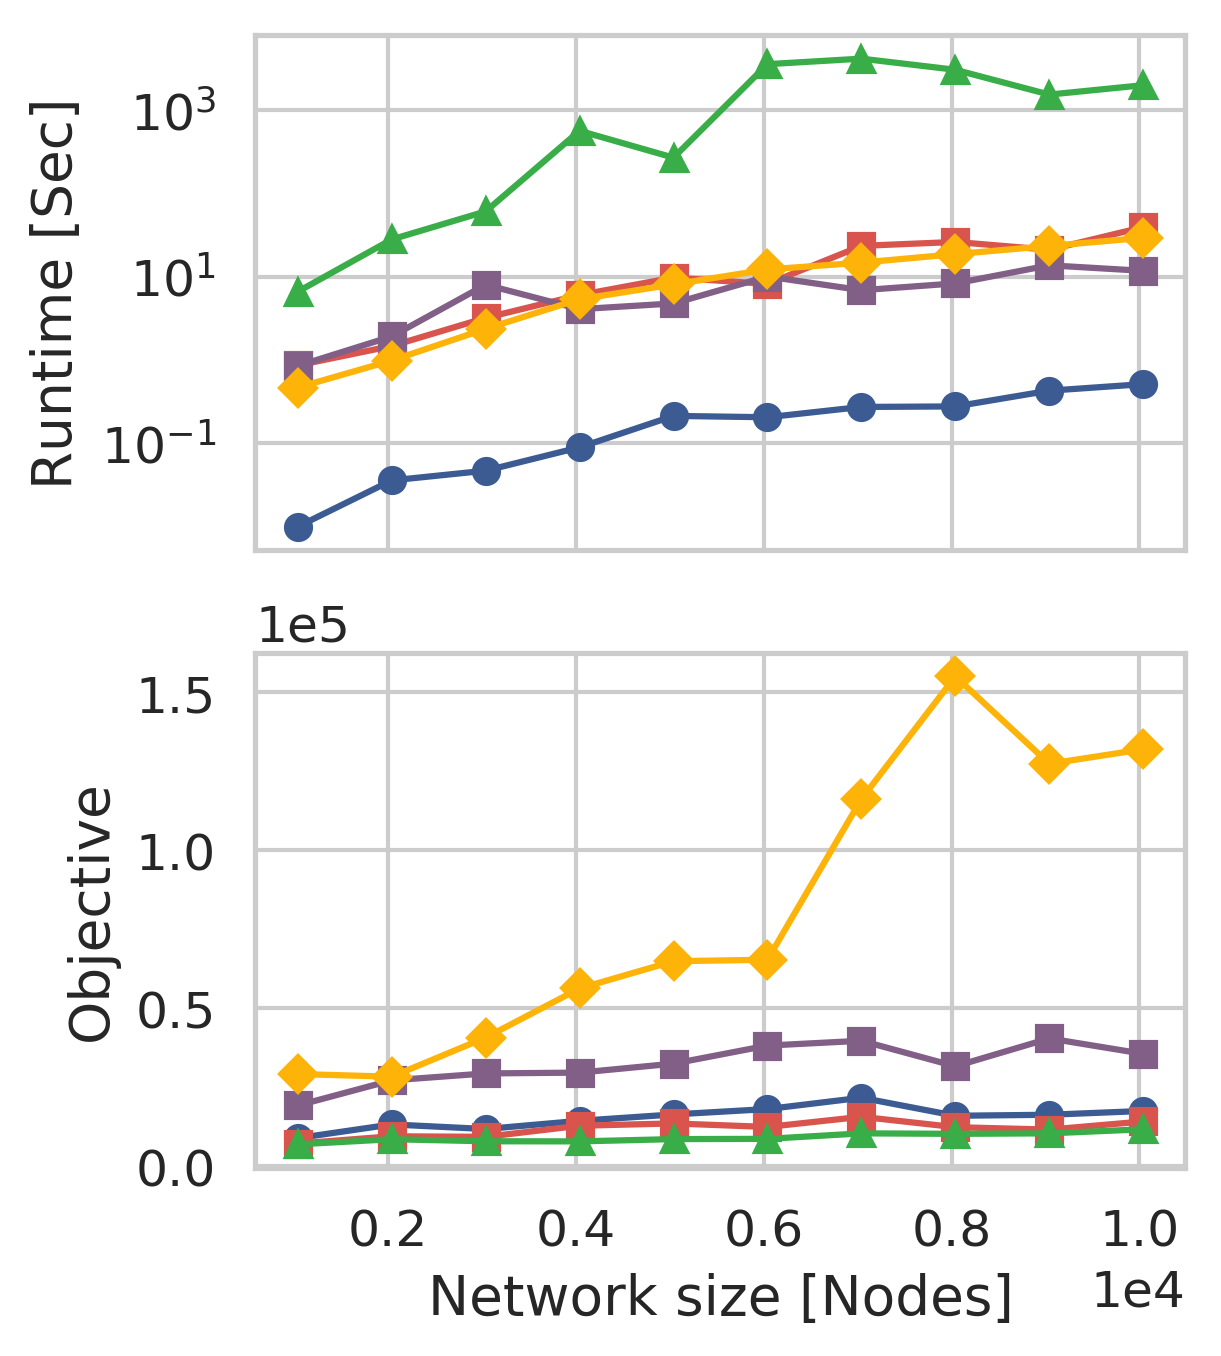

In [77]:
# nlr available for this experiment

plot_all('n_m-n0.05c-minc2m-k10',"",log=False,gurobi=True)

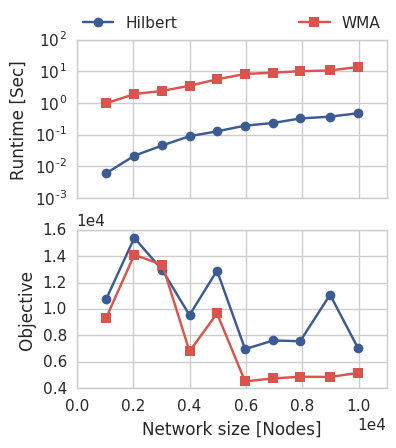

In [50]:
plot_all('n_m-n0.05c-minc2m-k10_2',"",log=False,gurobi=False,lims=(0,11000))

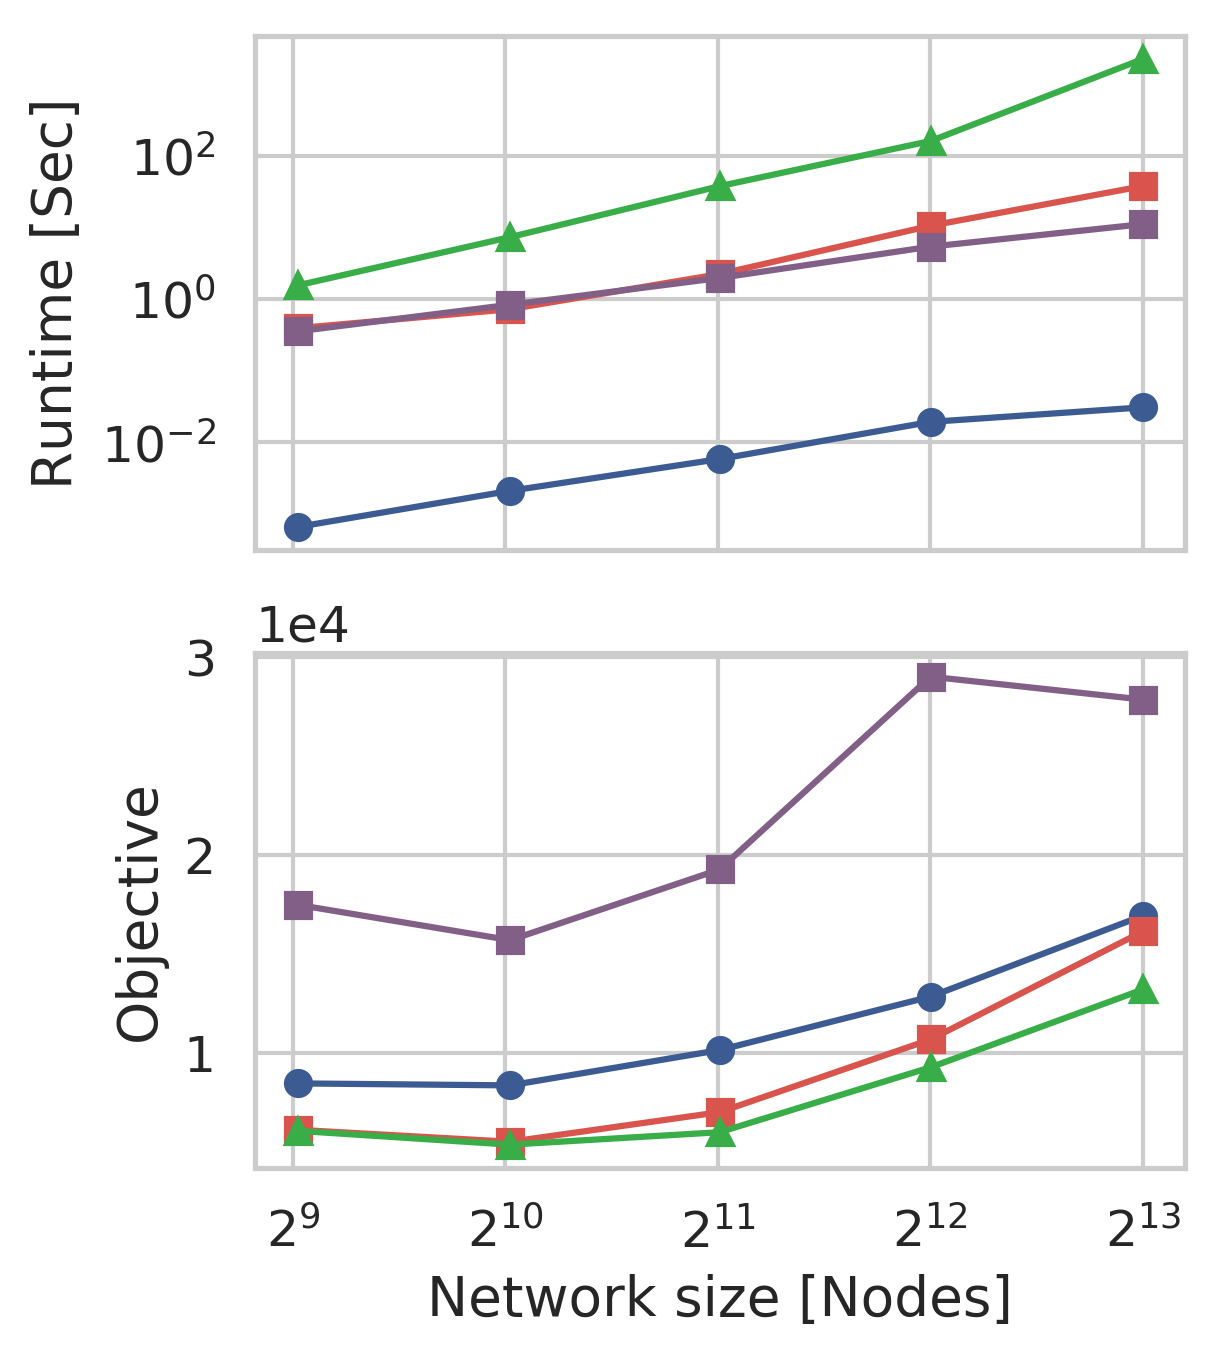

In [62]:
#not connected
plot_all('n_m-n0.05k-n0.01c20d2conClust20',"5% Customers, 0.5% Facilities, cap=20, not connected, 20 clusters")

In [4]:
#some points were lost for some reason, so put this in front of gurobi plotting code:

#         print(results15)
        results15.set_value(results15[results15["id"] == "1493804677534157534"].index[0],'objective',15500)
        results15.set_value(results15[results15["id"] == "149380469216546882"].index[0],'objective',16000)
        results15.set_value(results15[results15["id"] == "1493804677534157534"].index[0],'runtime',9)
        results15.set_value(results15[results15["id"] == "149380469216546882"].index[0],'runtime',20000)
#         print(results15)

plot_all('n_m-n0.05k-n0.01c20d1conClust20',"5% Cust, 1% Fac, cap=100, not conn, 20 clust, density=1",True,False)

IndentationError: unexpected indent (<ipython-input-4-f4c76fcfede4>, line 4)

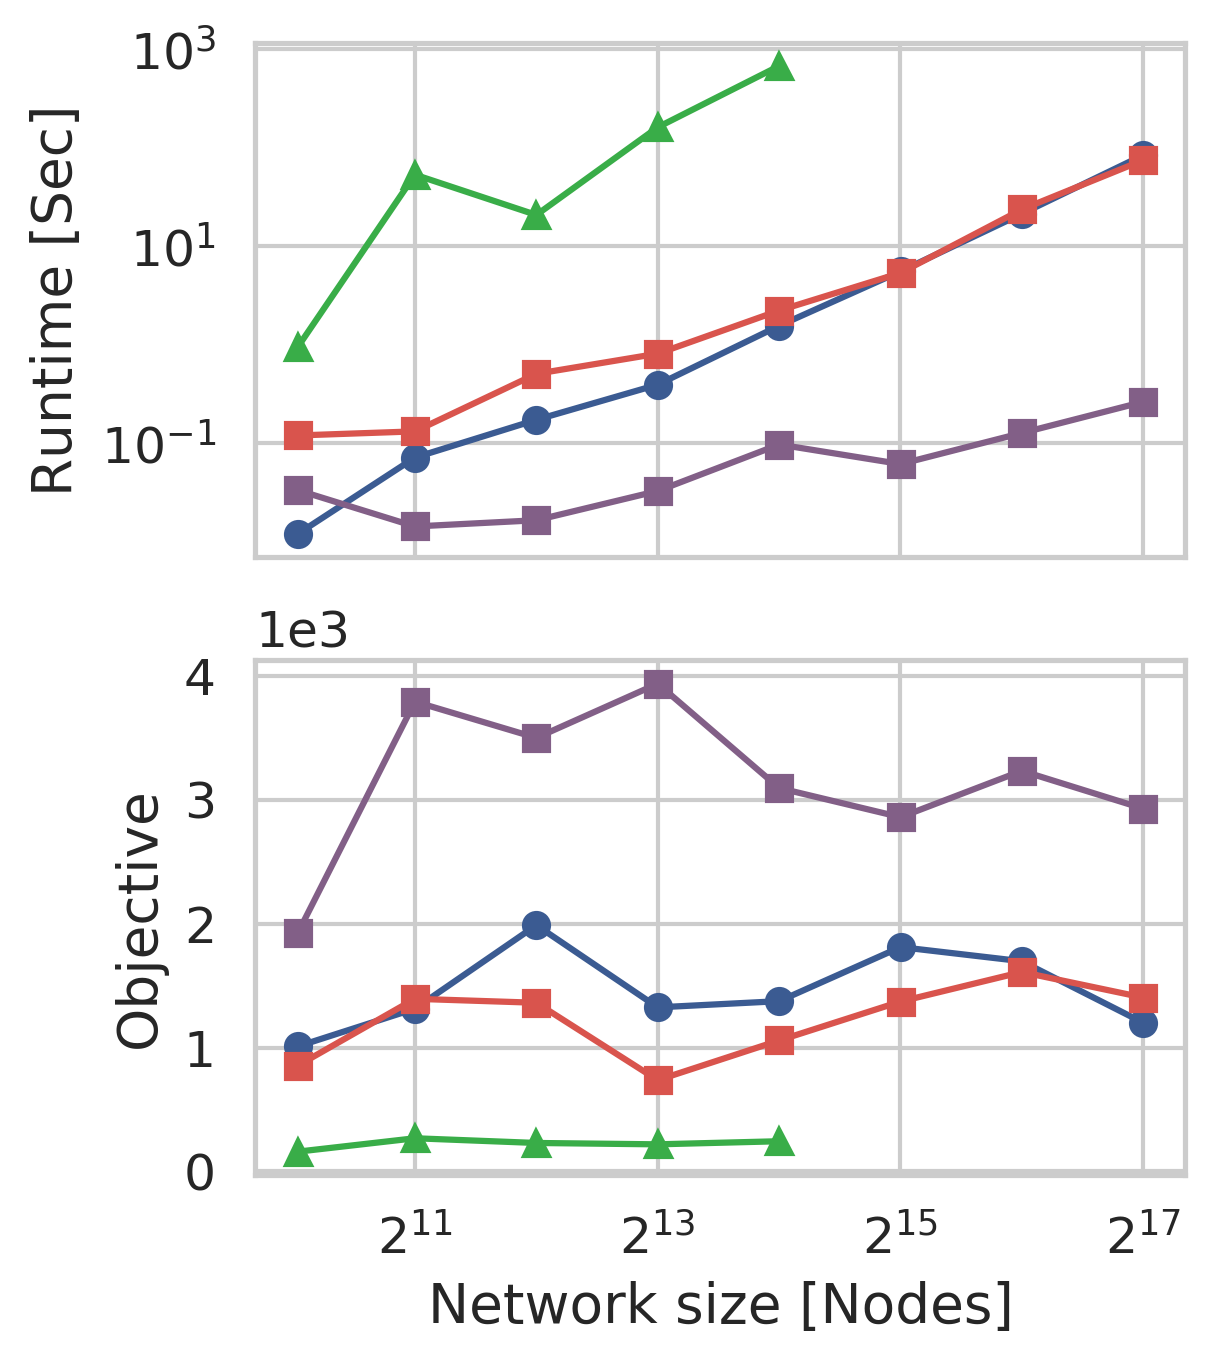

In [63]:
plot_all('n_m-n0.01c3',"1% Cust, 0.5% Fac, cap=3, not conn, 20 clust, density=2",True)

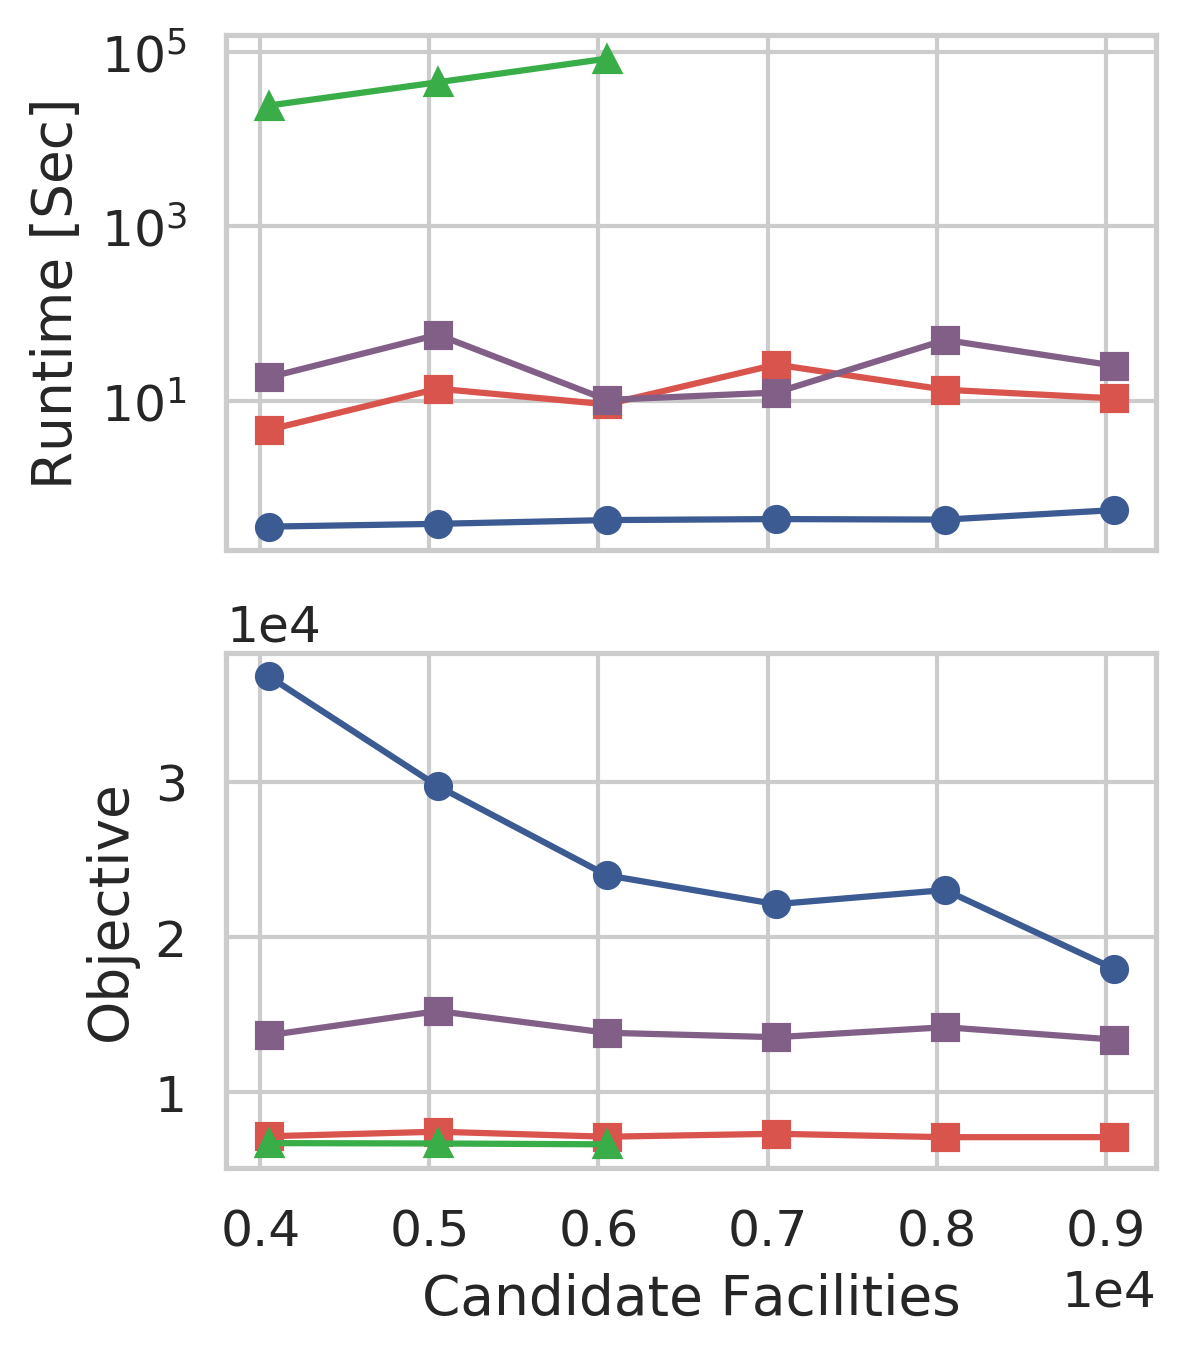

In [80]:
expnames = [("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
            ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s'),
#             ("nlr", "BRNN", sns.xkcd_rgb["amber"],'D'),
            ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
            ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]
# expnames = [("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
#             ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s')]
typedir = "clustered"

def plot_all_var_pot_loc(dirname, expname, log=True, sortby="vcount",xlabel="Network size [Nodes]",lims=None):
#     fontscale = 1.1
    fig, (ax1, ax2) = plt.subplots(2,figsize=(4, 5), dpi=300)
#     sns.set(font_scale=fontscale,style="whitegrid")
    
    for expname in expnames:
        results = load_results_pot_fac_loc(os.path.join(data_path, typedir, dirname, "solutions", expname[0]), 
                               os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
        results = results[results['objective'].notnull()]
        
        runtime_results = results['runtime'].copy()
#         if (re.match(r'gurobi',expname[0])):
#             for i in range(len(runtime_results)):
#                 try:
#                     f = open(os.path.join(data_path, typedir, dirname, results.iloc[i]['id'] + '.ntw.txt'), "r")
#                     distmatxtime = float(f.read())
#                     f.close()
#                     runtime_results.loc[results.iloc[i].name] += distmatxtime
#                 except IOError:
#                     print("No gurobi file exists for ", expname[0])
                    
#         sns.set(font_scale=fontscale,style="whitegrid")
        ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3])
        ax2.plot(results[sortby], results['objective'], expname[2], label=expname[1], marker=expname[3])
        
    # setting first axis
    ax1.set_yscale("log")
    if (log):
        ax1.set_xscale("log", basex=10)
        ax2.set_xscale("log", basex=10)
        
    ax1.set_ylabel("Runtime [Sec]")
#     ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#               ncol=5, mode="expand", borderaxespad=0.)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # setting second axis
#     ax2.ticklabel_format(style='sci', axis='y')
#     ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    ax2.yaxis.get_major_formatter().set_powerlimits((0, 0))
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    if (lims):
        ax1.set_xlim(lims[0], lims[1])
        ax2.set_xlim(lims[0], lims[1])
plot_all_var_pot_loc('n_m-n0.01c3_multi',"1% Cust, 0.5% Fac, cap=3, not conn, 20 clust, density=2",False,sortby='pot_fac_loc',xlabel='Candidate Facilities')

error in   [Errno 2] No such file or directory: '/q/storage/alogins/fcla_data/clustered/n_m-n0.01c3_multi2/solutions/fcla_g_rand'


FileNotFoundError: [Errno 2] No such file or directory: ''

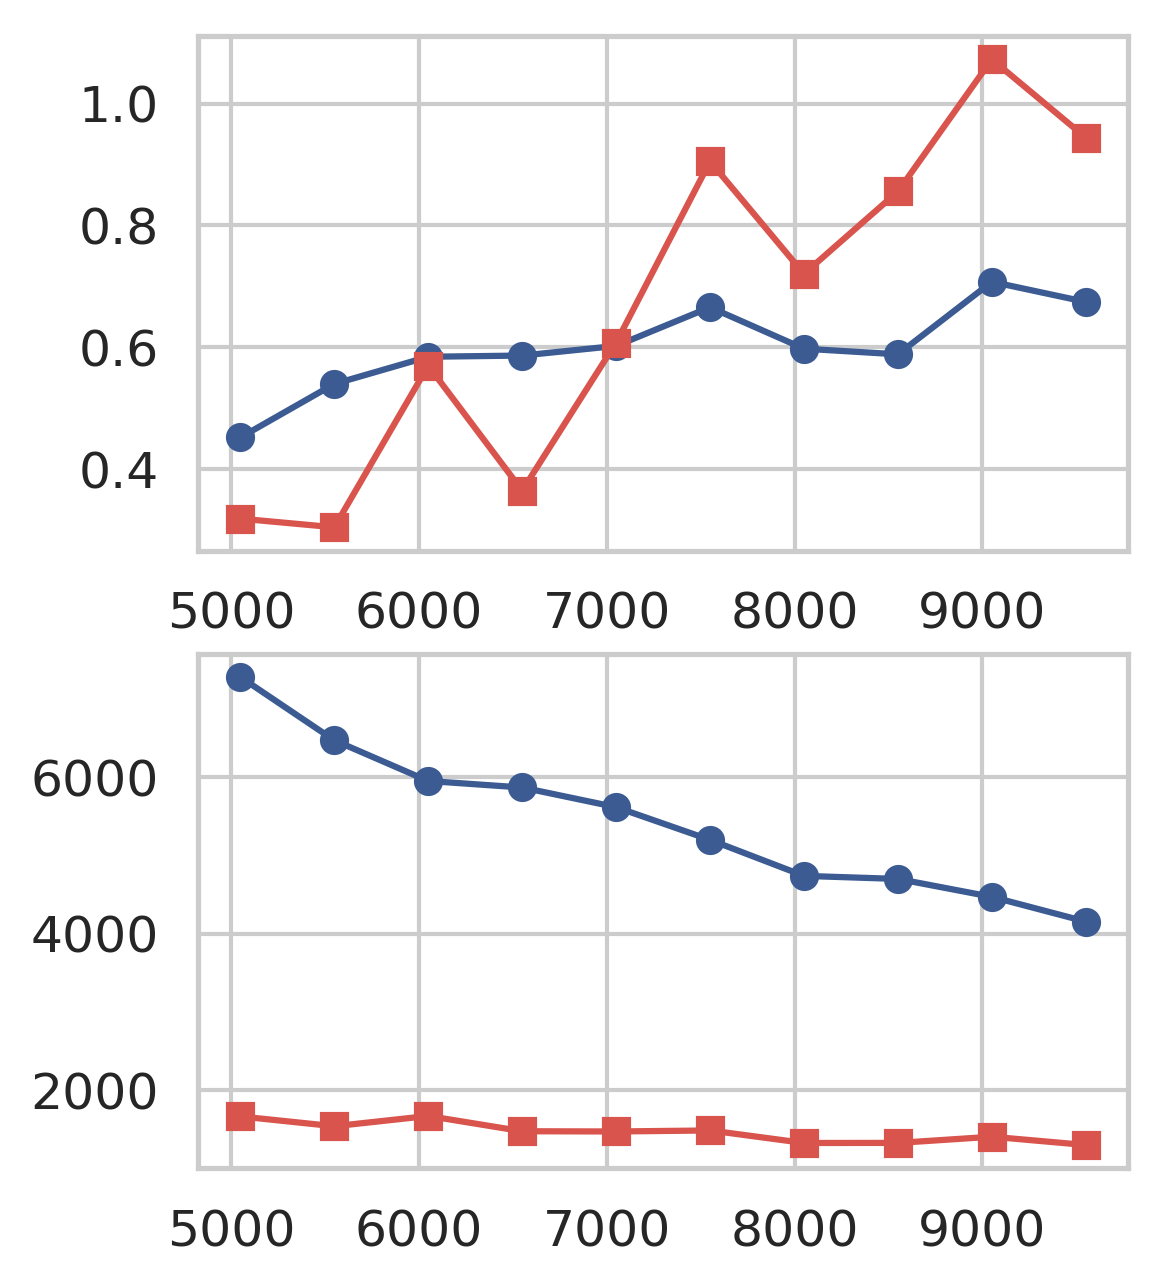

In [81]:
plot_all_var_pot_loc('n_m-n0.01c3_multi2',"1% Cust, 0.5% Fac, cap=3, not conn, 20 clust, density=2",False,sortby='pot_fac_loc',xlabel='Potential Facility Locations')

In [125]:
results15_fcla_l0 = load_results(os.path.join(data_path, "clustered", 'n_m-n0.01c3', "solutions", "fcla_l0"), 
                               os.path.join(data_path,'clustered','n_m-n0.01c3'))

In [46]:
results15_fcla_l0[['objective','runtime','vcount']]

,objective,runtime,vcount
0,1057.0,2.618050,16400.0
1,1403.0,90.107900,131100.0
2,226.0,0.086268,2050.0
3,1361.0,0.431368,4100.0
4,737.0,0.731957,8200.0
5,1609.0,27.229500,65550.0
6,1371.0,6.141410,32800.0
7,854.0,0.112586,1050.0
8,0.0,743.437000,262150.0


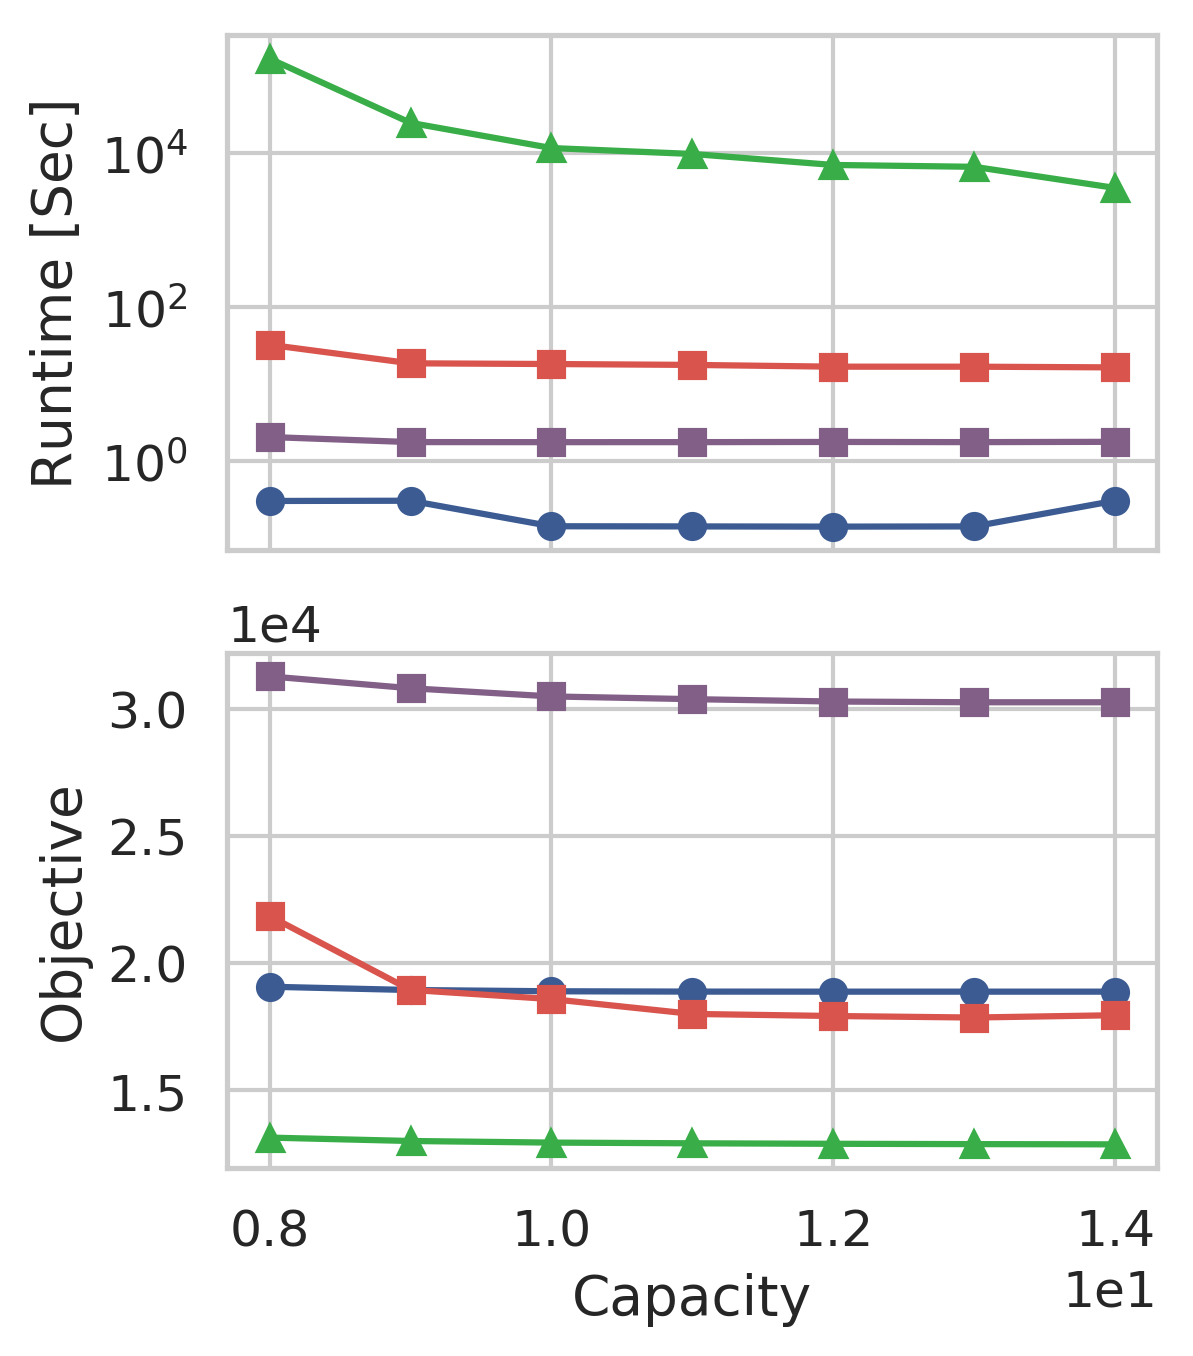

In [65]:
plot_all('c_n10000m1000k100cl20d1.5',"",False,sortby="capacity of facilities",xlabel="Capacity")

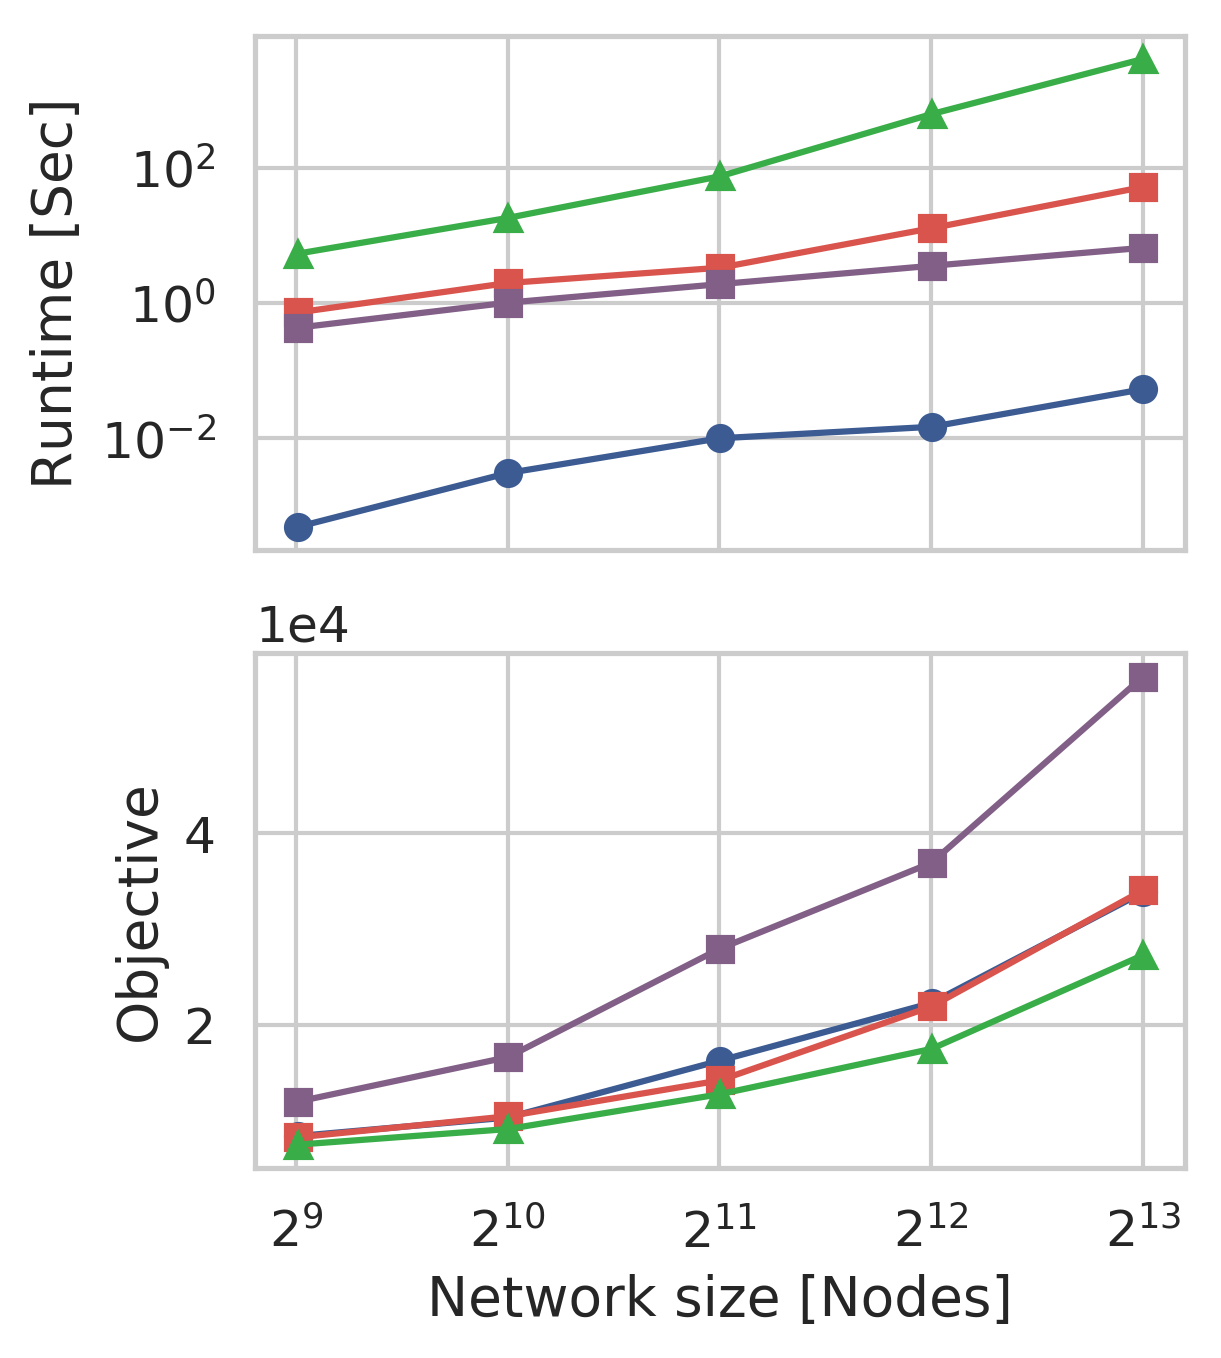

In [66]:
plot_all('n_m-n0.1k-n0.01c20d2conClust5',"",sortby="vcount")

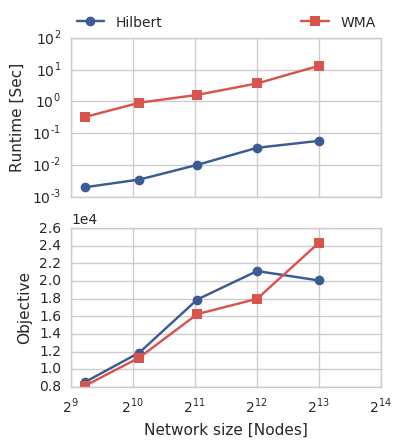

In [77]:
plot_all('n_m-n0.1k-n0.01c20d2conClust100',"",sortby="vcount",gurobi=False)

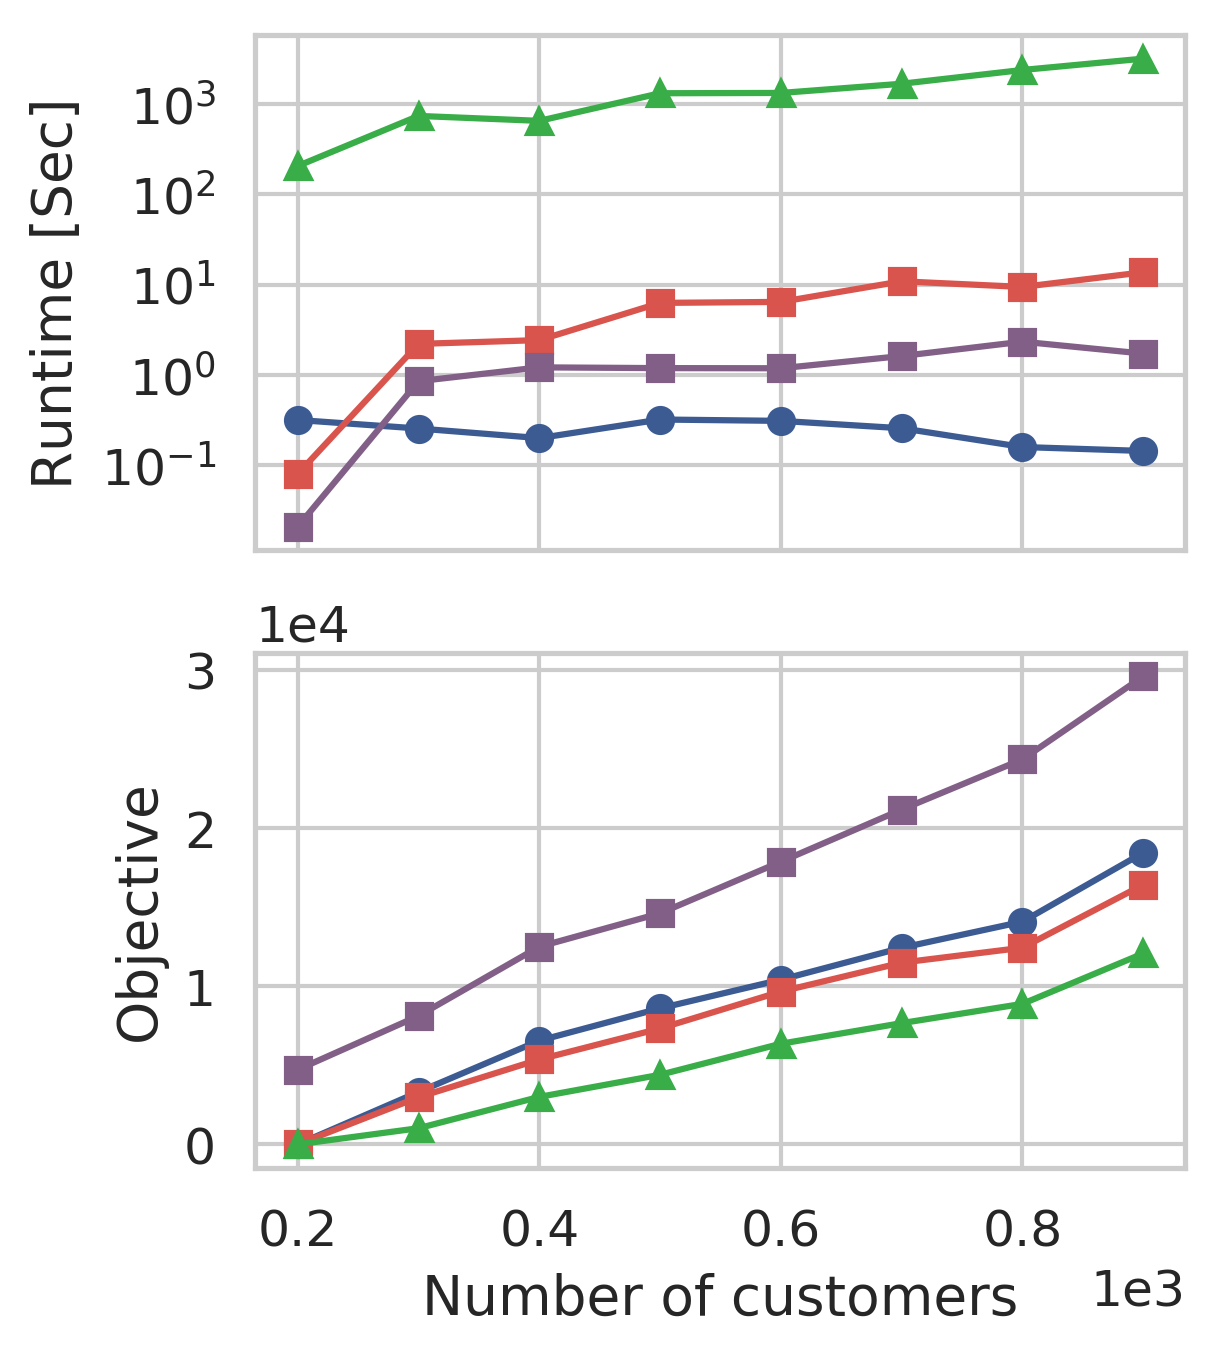

In [75]:
plot_all('m_n10000k200c10cl20',"",sortby="source_num",xlabel="Number of customers",log=False)

error in  /q/storage/alogins/fcla_data/clustered/m_multi_n10000k200c10cl20/1517564804214275993.json 'id'
{"avg_dist": 3111.1533141675118, "std_degree": 296.37599251881505, "vcount": 10017, "min_dist": 0, "avg_degree": 21.460117799740441, "min_degree": 0, "source_avg_clust": 0.5726735697384256, "source_avg_degree": 21.447857319791925, "max_dist": 10016, "source_num": 16384, "ecount": 107483, "std_dist": 10477536.605896, "max_degree": 101, "id": "1517564804214275993", "avg_clustering": 0.5725239693841122}
Probably you forgot to run getGraphInfo.py


AttributeError: 'NoneType' object has no attribute 'sort_values'

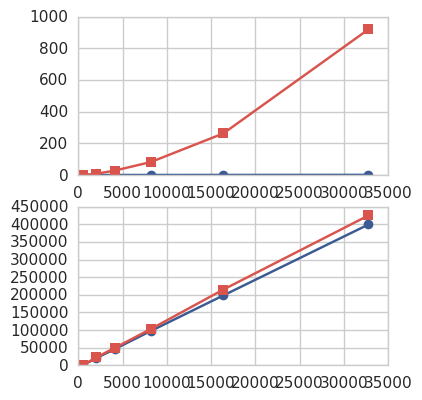

In [131]:
plot_all('m_multi_n10000k200c10cl20',"",sortby="source_num",xlabel="Number of customers")

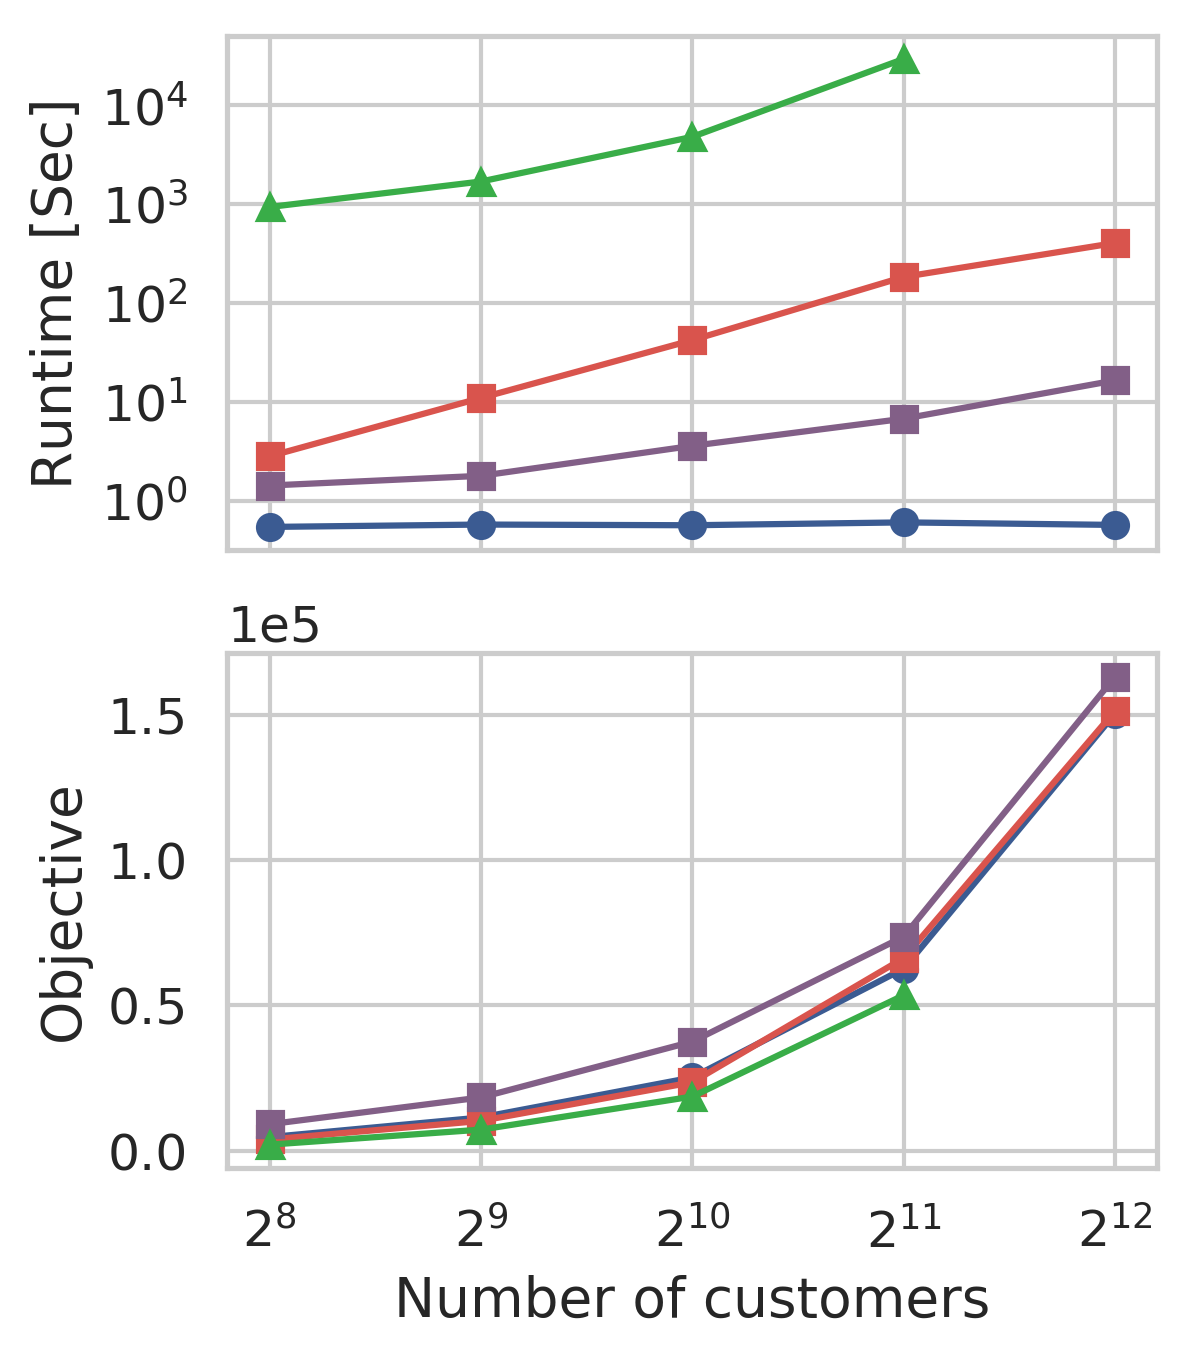

In [68]:
plot_all('m_n10000k200cl20',"",sortby="source_num",xlabel="Number of customers")

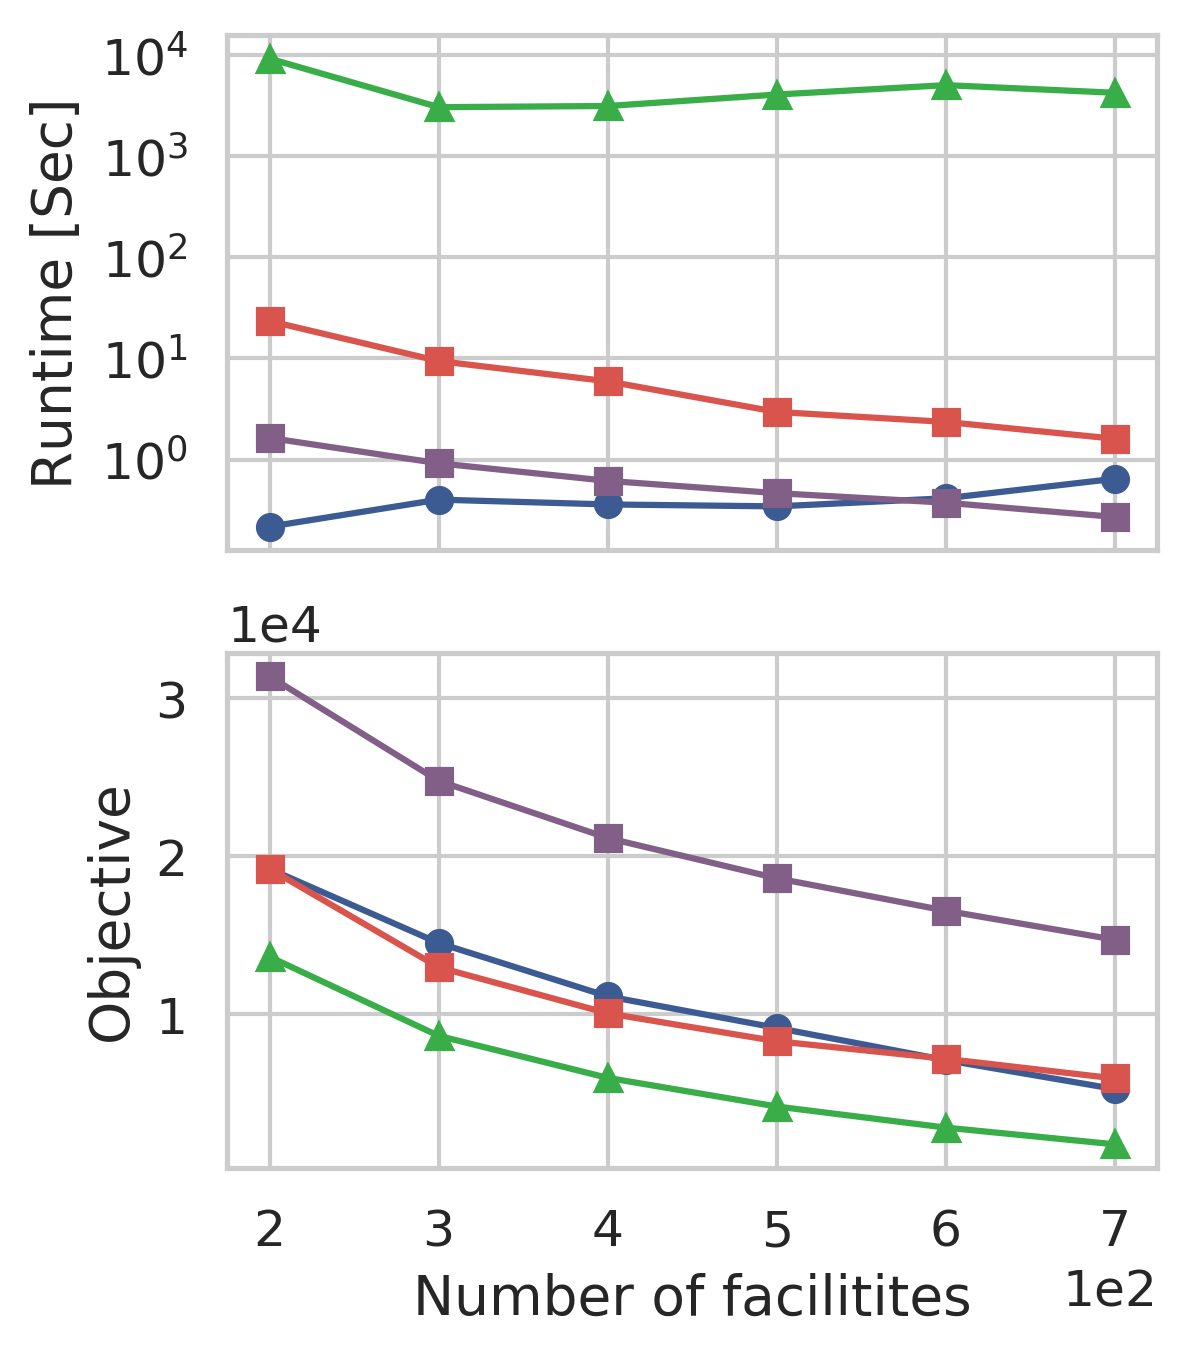

In [71]:
plot_all('k_n10000m1000c10cl20',"",sortby="number of facilities",xlabel="Number of facilitites",
         log=False, onegraph=True)

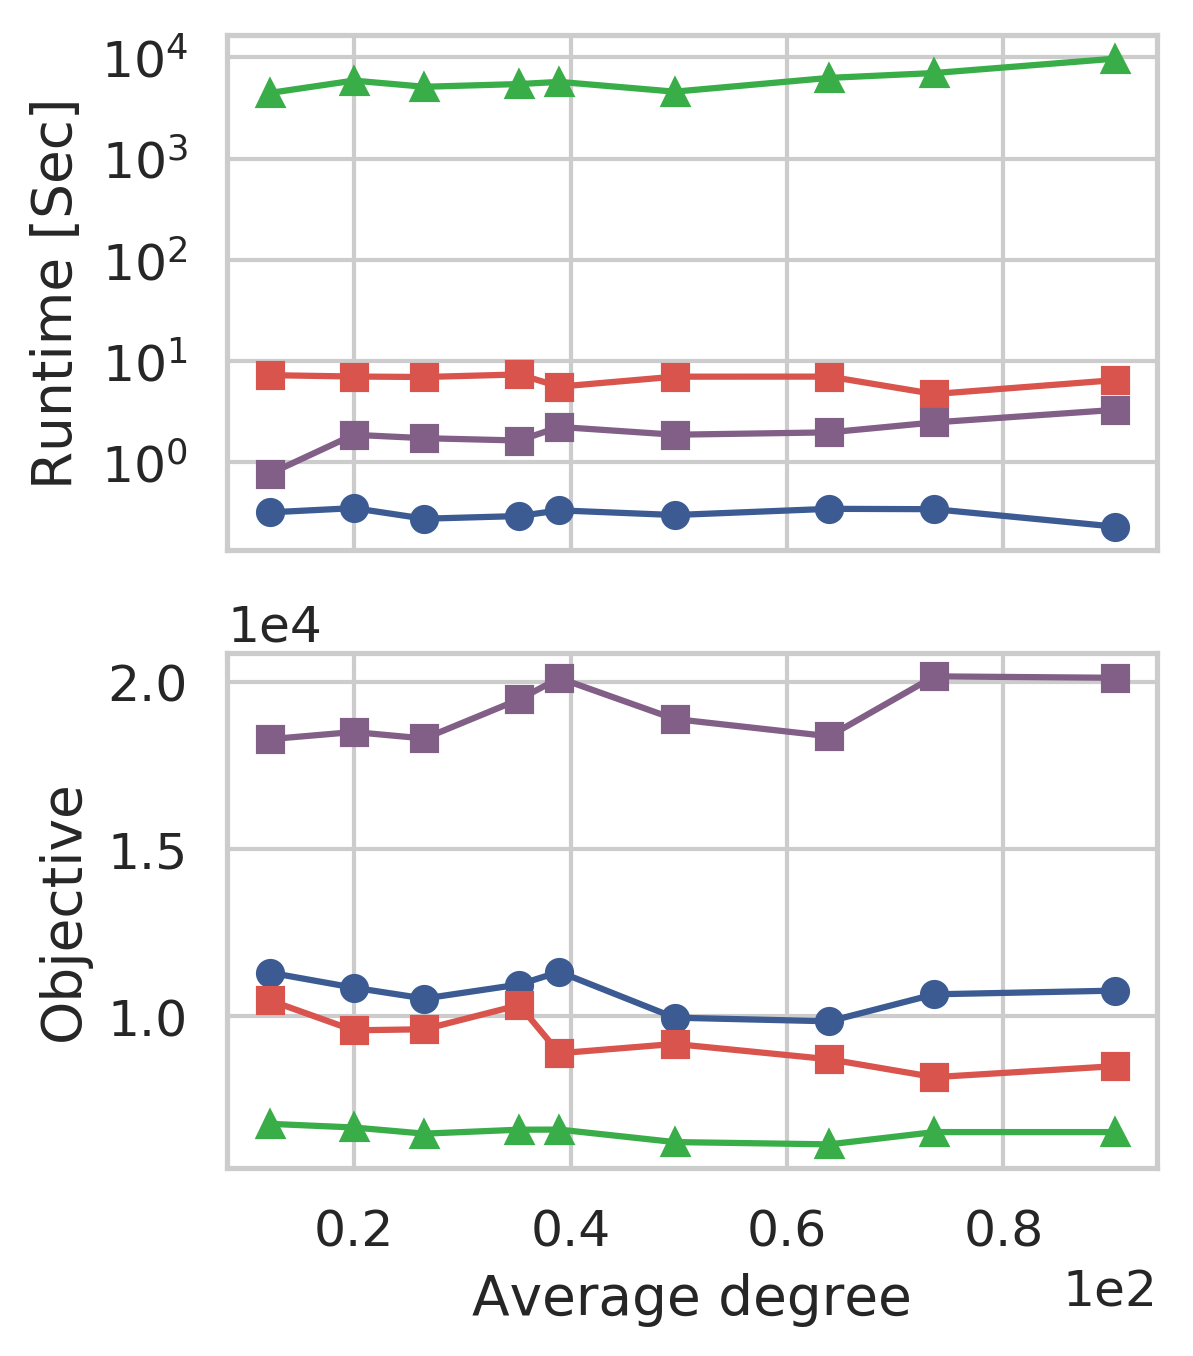

In [70]:
plot_all('d_n10000-m1000-cl40-k300-c10',"",sortby="avg_degree",xlabel="Average degree",log=False)

12    1518100409516866294
9     1518100409617216359
11     151810040971971043
0     1518100409822932860
13    1518100409930060207
1      151810041041164502
7     1518100410155244270
5     1518100410277117699
8     1518100410404179254
2     1518100410535265490
14    1518100410669347906
4     1518100410810302123
3      151810041110196444
6     1518100410956307680
10     151810041129372817
Name: id, dtype: object
8     1518100409516866294
1     1518100409617216359
6      151810040971971043
14    1518100409822932860
11    1518100409930060207
9      151810041041164502
5     1518100410155244270
7     1518100410277117699
10    1518100410404179254
0     1518100410535265490
3     1518100410669347906
2     1518100410810302123
13     151810041110196444
4     1518100410956307680
12     151810041129372817
Name: id, dtype: object


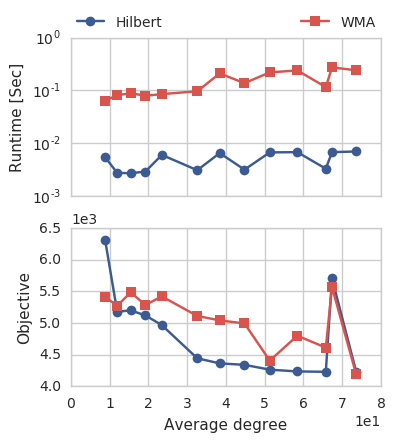

In [67]:
plot_all('d_n1000-m100-cl5-k30-c10',"",sortby="avg_degree",xlabel="Average degree",log=False)

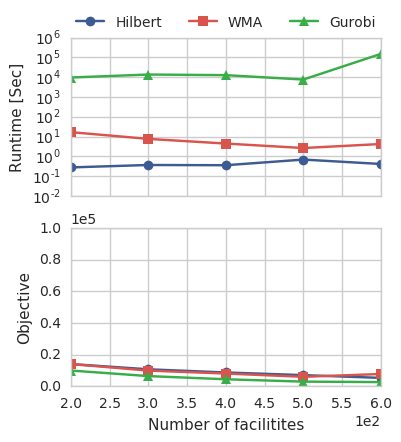

In [74]:
plot_all('kc_n10000m1000cl40',"",sortby="number of facilities",xlabel="Number of facilitites",
         log=False,onegraph=True,lims=(200,600))